# **Project Proposal for COVID19 prediction**

The COVID-19 pandemic has caused significant disruption globally, and the situation continues to evolve. The analysis and prediction of COVID-19 spread are essential for effective public health policies and prevention strategies. This project aims to analyze COVID-19 data from various sources and develop models to predict the future spread of the virus.

Dataset Description
Dataset contails symptoms of patients which is crucial to identify the infection of covid. Columns are categorical in nature. Details of the columns are :

ID (Individual ID)

Sex (male/female).

Age ≥60 above years (true/false)

Test date (date when tested for COVID)

Cough (true/false).

Fever (true/false).

Sore throat (true/false).

Shortness of breath (true/false).

Headache (true/false).

Known contact with an individual confirmed to have COVID-19 (true/false).
Corona positive or negative

# **Data Importing**

In [59]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [18]:
# loading the dataset

df = pd.read_csv('/content/corona.csv')

In [3]:
# first 5 rows

df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


# **Data Preprocessing**

In [4]:
# function to convert the data

def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [5]:
# mapping the function

df['Cough_symptoms'] = df['Cough_symptoms'].map(convert)
df['Fever'] = df['Fever'].map(convert)
df['Sore_throat'] = df['Sore_throat'].map(convert)
df['Shortness_of_breath'] = df['Shortness_of_breath'].map(convert)
df['Headache'] = df['Headache'].map(convert)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# replacing the none values with Nan values

df.replace({'None': np.nan}, inplace=True)

In [8]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [9]:
# Dropping the nan values from columns

df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0,inplace=True)

In [10]:
# dropping the age_60_above column

df.drop('Age_60_above',axis=1,inplace=True)

In [11]:
# # replacing the none values with Nan values

df.replace({'other': np.nan},inplace=True)

In [12]:
# Dropping the nan values from columns

df.dropna(subset=['Corona'],axis=0,inplace=True)

In [13]:
# converting the datatype as categorical

for i in df.columns:
    if i=='Ind_ID' or i == 'Test_date':
        pass
    else:
        df[i] = df[i].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  255668 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(8), int64(1), object(1)
memory usage: 8.4+ MB


# **Explorartory Data Analysis**

In [60]:
sns.set_style('dark')

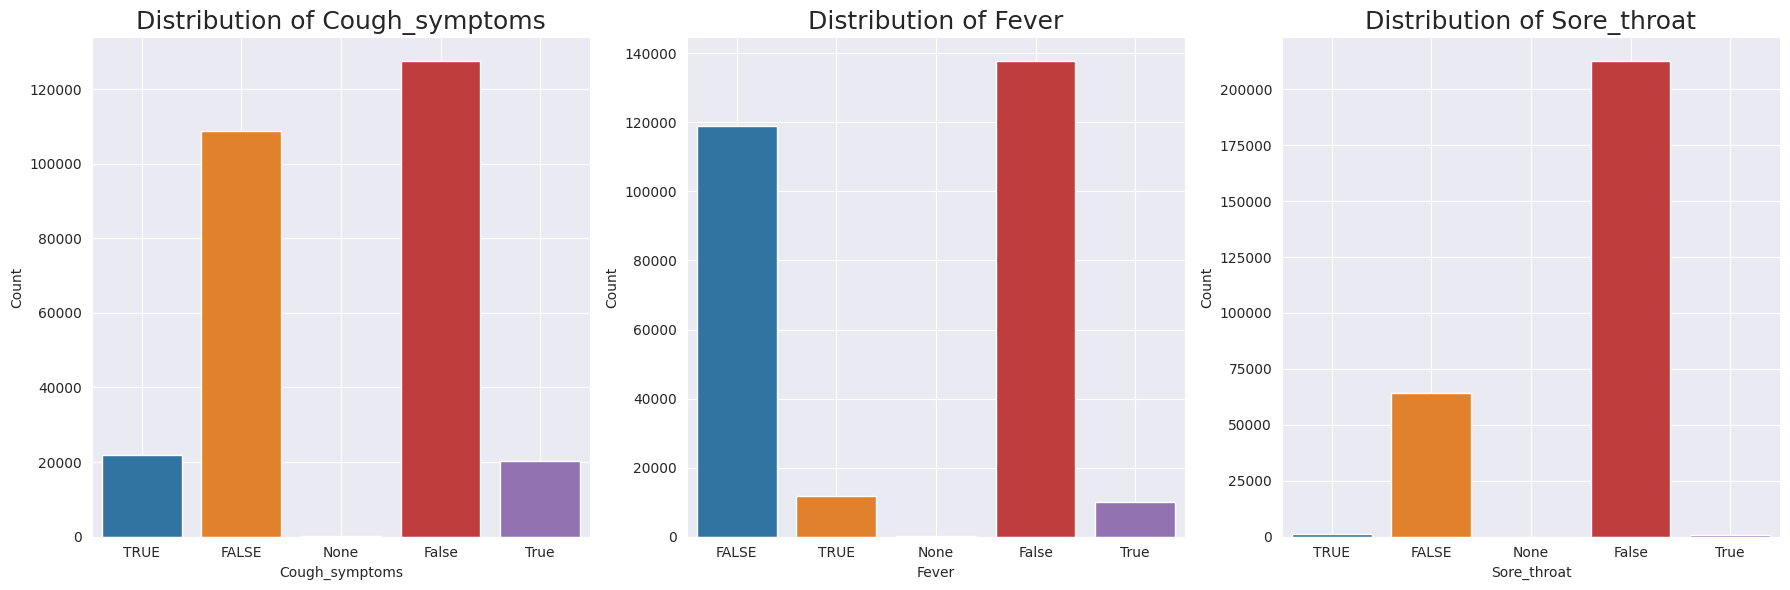

In [61]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

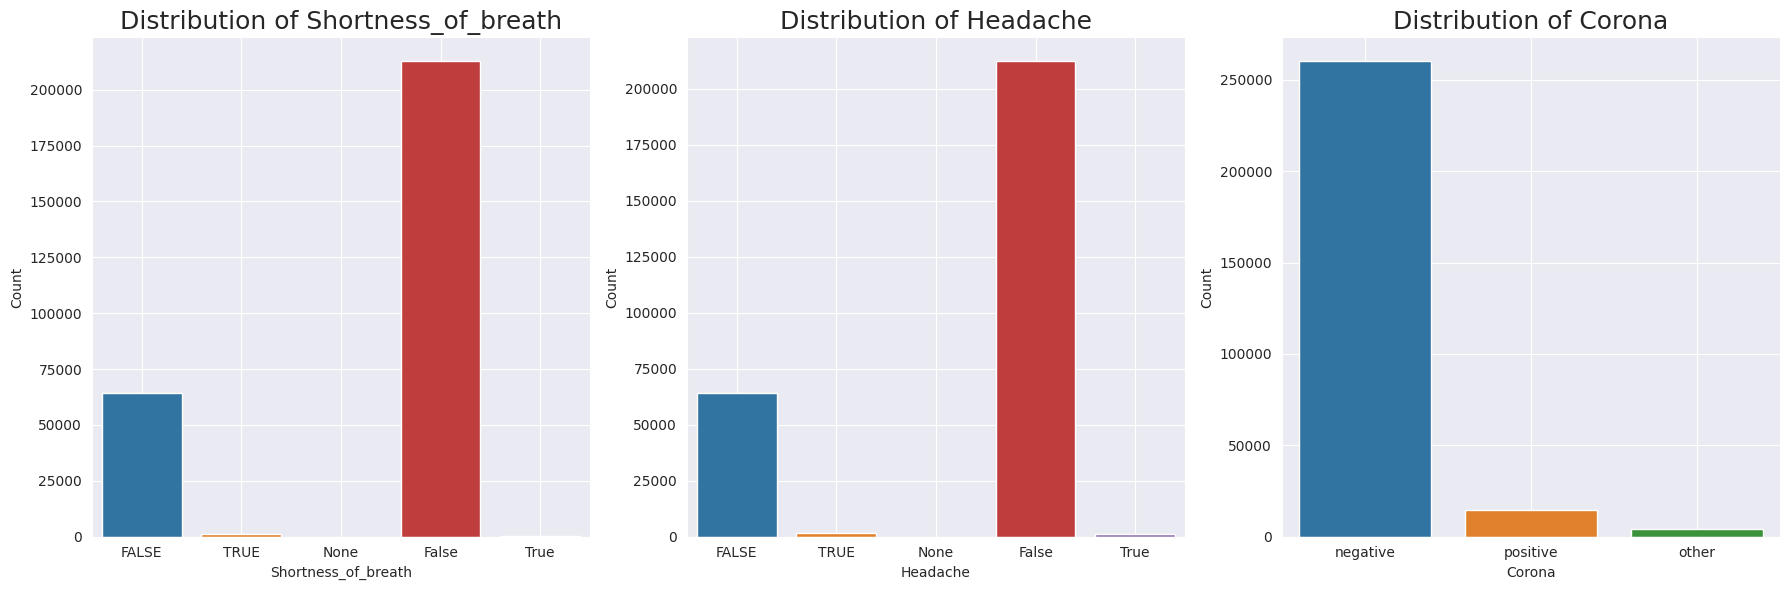

In [62]:
cols = ['Shortness_of_breath','Headache',	'Corona']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

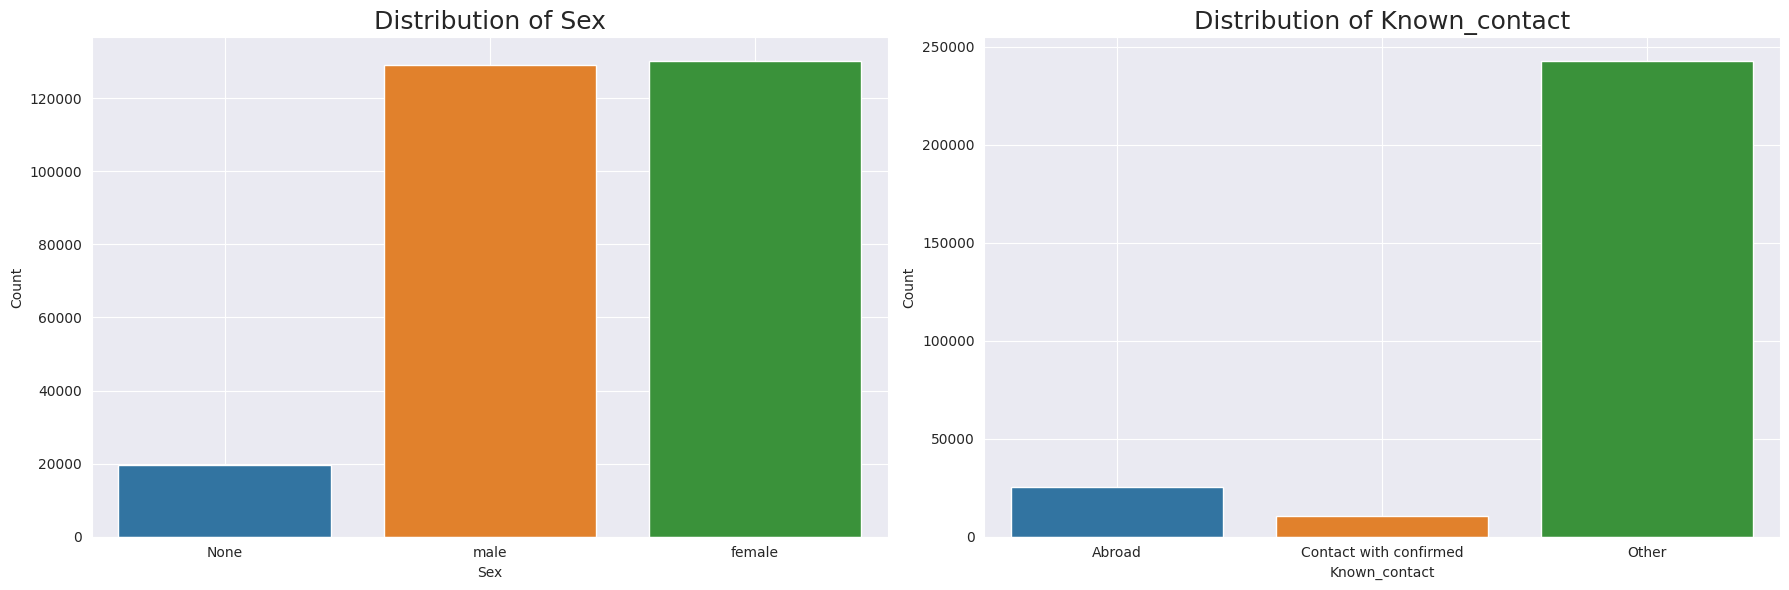

In [63]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

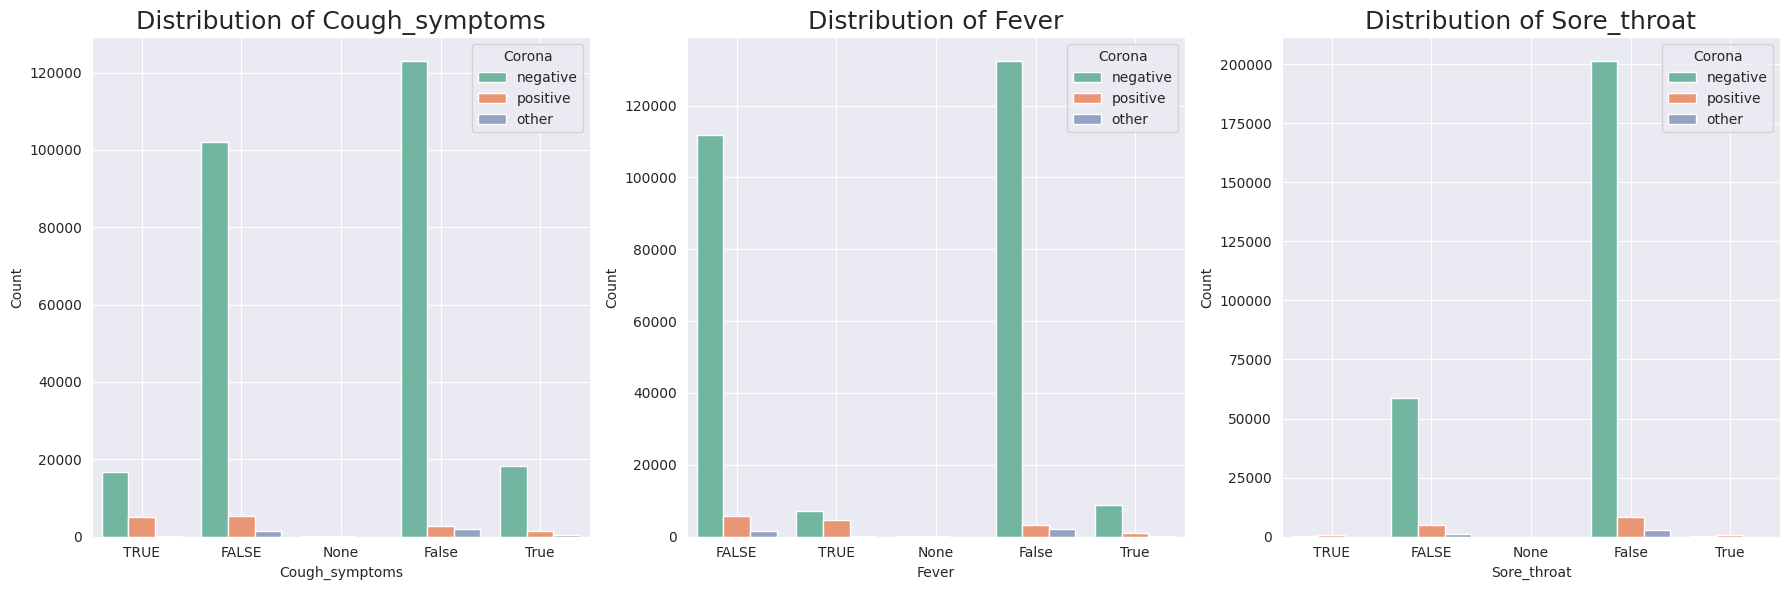

In [64]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

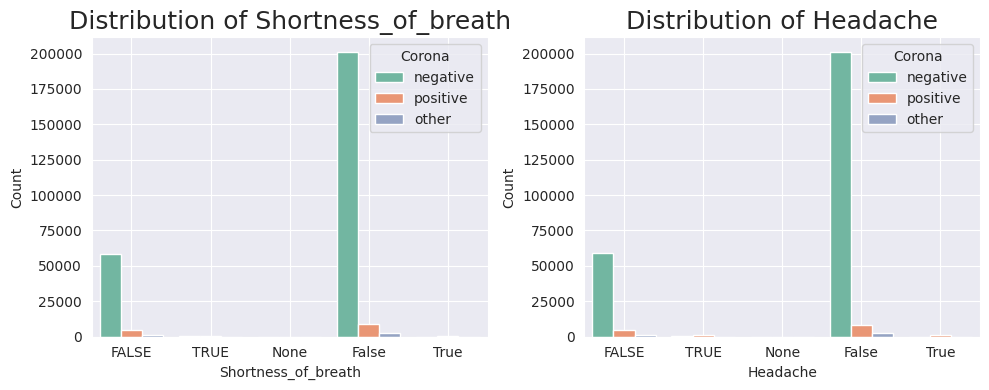

In [65]:
cols = ['Shortness_of_breath','Headache']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

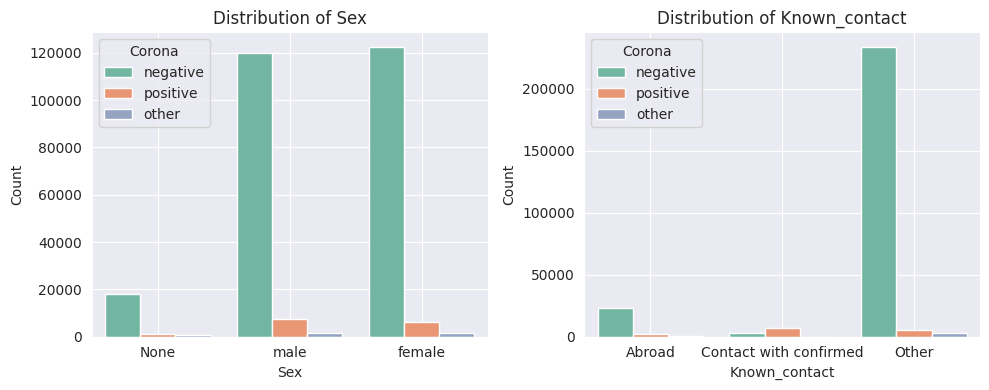

In [66]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=12 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

- Cough_symptoms: A significant number of individuals who tested negative also reported no cough symptoms. However, among those who reported having a cough, the number of positive cases is relatively higher.

- Fever: Most individuals did not report having a fever. Among those who did, the number of positive cases is higher than negative cases.

- Sore_throat: The majority did not experience this symptom.

- Shortness_of_breath: This symptom was also not common among the individuals.

- Headache: A notable number of individuals reported not having headaches.

- Age_60_above: A considerable number of individuals were below 60 years of age.

- Sex: The number of females and males in the dataset is almost evenly distributed.

- Known_contact: Most individuals did not have a known contact with a confirmed case.

# **Feature Transformation**

In [15]:
# creating a copy of original dataframe

covid_df = df.copy(deep=True)

In [19]:
# Encoding

covid_df['Cough_symptoms'] = pd.get_dummies(covid_df['Cough_symptoms'],drop_first=True)  # to aviod multicolinearity

covid_df['Fever'] = pd.get_dummies(covid_df['Fever'],drop_first=True)

covid_df['Sore_throat'] = pd.get_dummies(covid_df['Sore_throat'],drop_first=True)

covid_df['Shortness_of_breath'] = pd.get_dummies(covid_df['Shortness_of_breath'],drop_first=True)

covid_df['Headache'] = pd.get_dummies(covid_df['Headache'],drop_first=True)

covid_df['Corona'] = pd.get_dummies(covid_df['Corona'],drop_first=True)

In [20]:
# encoding

covid_df['Sex'].replace({'male':0,'female':1},inplace=True)
covid_df['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [21]:
covid_df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,NaN,0
1,2,11-03-2020,0,1,0,0,0,1,NaN,0
2,3,11-03-2020,0,1,0,0,0,1,NaN,0
3,4,11-03-2020,1,0,0,0,0,0,NaN,0
4,5,11-03-2020,1,0,0,0,0,0,NaN,1


In [22]:
covid_df.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19034
Known_contact              0
dtype: int64

# **Missing Value Impuatation**

In [23]:
from sklearn.impute import KNNImputer

In [24]:
# creating a copy of original dataframe

imputed_data = covid_df.copy(deep=True)

In [26]:
# applying KNN imputation

knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Sex','Known_contact']
imputed=knn.fit_transform(covid_df[columns])

In [27]:
df1 = pandas.DataFrame(imputed,columns=columns)

In [28]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [29]:
df1['Sex'] = df1['Sex'].apply(change)

In [31]:
imputed_data['Sex'].iloc[:] =df1['Sex']

In [32]:
imputed_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1


In [33]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  uint8   
 3   Fever                274702 non-null  uint8   
 4   Sore_throat          274702 non-null  uint8   
 5   Shortness_of_breath  274702 non-null  uint8   
 6   Headache             274702 non-null  uint8   
 7   Corona               274702 non-null  uint8   
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(2), int64(1), object(1), uint8(6)
memory usage: 8.4+ MB


In [34]:
imputed_data['Sex'] = imputed_data['Sex'].astype('uint8')

In [35]:
# strong teh data in final df

final_data = imputed_data.astype('category')

In [36]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  category
 1   Test_date            274702 non-null  category
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(10)
memory usage: 15.7 MB


# **Feature Engineering**

In [37]:
# separating features and target variable

features = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)

target = final_data['Corona']

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [39]:
# chi square method to select important k best features

selector = SelectKBest(score_func=chi2, k=6)

X_new = selector.fit_transform(features, target)

idxs_selected = selector.get_support(indices=True)

feat_names = features.columns[idxs_selected]

feat_names

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')

- This shows covid symptoms are the important features of the dataset.

In [40]:
from sklearn.model_selection import train_test_split

# splitting train test set

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)


In [41]:
y_test.value_counts()

0    78054
1     4357
Name: Corona, dtype: int64

In [42]:
y_train.value_counts()

0    181954
1     10337
Name: Corona, dtype: int64

# **Model Training**

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix


# **Random Forest**

In [44]:
# random forest

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
# Making predictions using the Random Forest model
pred_rf = rf.predict(x_test)

# accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy_rf*100)

# precision
precision_rf = precision_score(y_test, pred_rf)
print("Precision:", precision_rf*100)

# recall
recall_rf = recall_score(y_test, pred_rf)
print("Recall:", recall_rf*100)

#  F1 score
f1_rf = f1_score(y_test, pred_rf)
print("F1 Score:", f1_rf*100)

Accuracy: 96.75164723155889
Precision: 74.97027348394768
Recall: 57.88386504475557
F1 Score: 65.3283253464577


**Hyper Parameter Tuning**

In [52]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15, 20, None],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]}


scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(rfc, param_grid, scoring=scorer)
grid_fit = grid_obj.fit(x_train, y_train)

In [53]:
# Get the best hyperparameters

best_params = grid_fit.best_params_
best_params

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [54]:
# Training the model using the best hyperparameters

rfc_best = RandomForestClassifier(random_state=42, **best_params)

rfc_best.fit(x_train, y_train)

y_pred_rf = rfc_best.predict(x_test)

In [55]:
# Evaluate the best model

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy: {:.10f}%".format(accuracy_rf * 100.0))

Accuracy: 96.7577143828%


In [58]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# precision
prec_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[0][1])
print("Precision:", prec_rf)

# recall
recall_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[1][0])
print('recall :',recall_rf)

# F-1 Score
f1_rf=2*prec_rf*recall_rf/(recall_rf + prec_rf)
print("F1 Score:", f1_rf)

# False Negative Score
fnr_rf = cm_rf[1][0]*100/(cm_rf[0][0] + cm_rf[1][0])
print('False Negative rate : ',fnr_rf)

Confusion Matrix:
 [[77217   837]
 [ 1835  2522]]
Precision: 98.9276654623722
recall : 97.67874310580378
F1 Score: 98.29923745751275
False Negative rate :  2.321256894196225


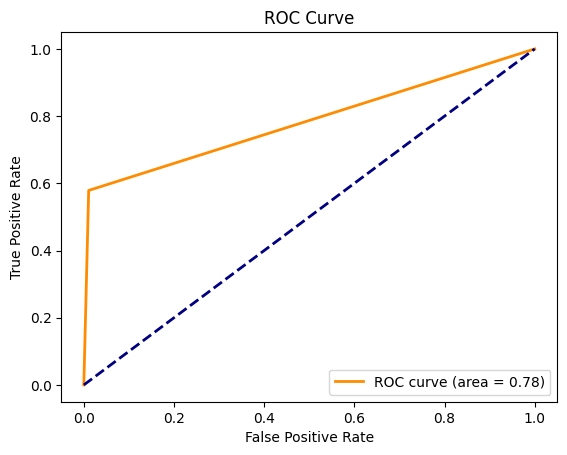

In [57]:
# AUC ROC curve

fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()